# Credit card default prediction

### Dataset source: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/data

### Problem statement
#### Business Objective
Estimate the probability that a credit card client will default on their payment in the next month, enabling risk teams to make decisions such as adjusting credit limits, prioritizing collections, or setting monitoring strategies to reduce expected loss.

##### Target Variable
The target variable is "**default.payment.next.month**", which indicates whether a client will default on their credit card payment in the next month. It is a binary variable where 1 indicates default and 0 indicates no default.

##### Input data
- **Dataset size**: 30,000 clients from a Taiwanese bank (UCI/Kaggle dataset).
- **Features**:  23, excluding ID and target variable.
1. **Client demographics** (SEX, EDUCATION, MARRIAGE, AGE).
2. **Financial standing** (LIMIT_BAL).
3. **History of past payments** (PAY_0, PAY_2 to PAY_6).
4. **Bill statement amounts** (BILL_AMT1 to BILL_AMT6).
5. **Previous payment amounts** (PAY_AMT1 to PAY_AMT6).

##### Output
Calibrated probability of default within the next month per client.







#### Data understanding
To understand the dataset, I would take the following steps:

- **Load the data**: Read the UCI_Credit_Card.csv file into a pandas DataFrame.
- **Initial Exploration**: Examine the first few rows, column names, and data types.
- **Descriptive Statistics**: Generate summary statistics for numerical columns to understand their distribution (e.g., mean, median, min, max).
- **Meaningful names** for columns
- **Missing Values**: Check for missing values in each column to identify data quality issues.
- **Target Variable Analysis**: Analyze the distribution of the 'default.payment.next.month' column to spot outliers or skewness.
- **Feature Analysis**:
1. **For categorical features**, I'll examine the unique values and their frequencies.
2. **For numerical features**, I'll look at their distributions using histograms.
- **Correlation Analysis**: Investigate relationships between features and the target variable, 'default.payment.next.month'.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/UCI_Credit_Card.csv')
# Examine the first few rows, column names, and data types
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [35]:
# Examine column names, and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [36]:
# Total number of rows and columns
data.shape

(30000, 25)

In [37]:
# Check for missing values in each column to identify data quality issues.
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [38]:
# Rename columns to be more descriptive
data.rename(columns={
    'LIMIT_BAL': 'Credit_Limit',
    'SEX': 'Gender',
    'EDUCATION': 'Education',
    'MARRIAGE': 'Marital_Status',
    'AGE': 'Age',
    'PAY_0': 'Repayment_Status_Sept',
    'PAY_2': 'Repayment_Status_Aug',
    'PAY_3': 'Repayment_Status_Jul',
    'PAY_4': 'Repayment_Status_Jun',
    'PAY_5': 'Repayment_Status_May',
    'PAY_6': 'Repayment_Status_Apr',
    'BILL_AMT1': 'Bill_Amount_Sept',
    'BILL_AMT2': 'Bill_Amount_Aug',
    'BILL_AMT3': 'Bill_Amount_Jul',
    'BILL_AMT4': 'Bill_Amount_Jun',
    'BILL_AMT5': 'Bill_Amount_May',
    'BILL_AMT6': 'Bill_Amount_Apr',
    'PAY_AMT1': 'Previous_Payment_Sept',
    'PAY_AMT2': 'Previous_Payment_Aug',
    'PAY_AMT3': 'Previous_Payment_Jul',
    'PAY_AMT4': 'Previous_Payment_Jun',
    'PAY_AMT5': 'Previous_Payment_May',
    'PAY_AMT6': 'Previous_Payment_Apr',
    'default.payment.next.month': 'Default_Payment'
}, inplace=True)

# Display the first 5 rows with new column names
data.head()

,ID,Credit_Limit,Gender,Education,Marital_Status,Age,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Previous_Payment_Sept,Previous_Payment_Aug,Previous_Payment_Jul,Previous_Payment_Jun,Previous_Payment_May,Previous_Payment_Apr,Default_Payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [39]:
# Analyze the distribution of the target variable
default_counts = data['Default_Payment'].value_counts()
print(default_counts)

Default_Payment
0    23364
1     6636
Name: count, dtype: int64


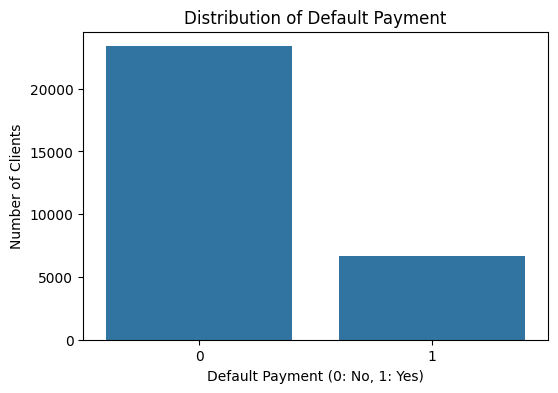

In [40]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Default_Payment', data=data)
plt.title('Distribution of Default Payment')
plt.xlabel('Default Payment (0: No, 1: Yes)')
plt.ylabel('Number of Clients')
plt.show()